In [3]:
%%file 'C:/Users/zurit/OneDrive/PROJECTS/DEVELOPING/blog/files/fnc.m'

function c = multi_line_func(a,b)
    % in-file comments can be added like this
    a = a+1;
    b = b+2;
    c = a+b;
end



Created file 'C:\Users\zurit\OneDrive\PROJECTS\DEVELOPING\blog\files\fnc.m'.


c =
     6     6     6     6     6     6     6     6     6     6
c =
     6     8     8     8     8     8     8     8     8     8
c =
     6     8    10    10    10    10    10    10    10    10
c =
     6     8    10    12    12    12    12    12    12    12
c =
     6     8    10    12    14    14    14    14    14    14
c =
     6     8    10    12    14    16    16    16    16    16
c =
     6     8    10    12    14    16    18    18    18    18
c =
     6     8    10    12    14    16    18    20    20    20
c =
     6     8    10    12    14    16    18    20    22    22
c =
     6     8    10    12    14    16    18    20    22    24



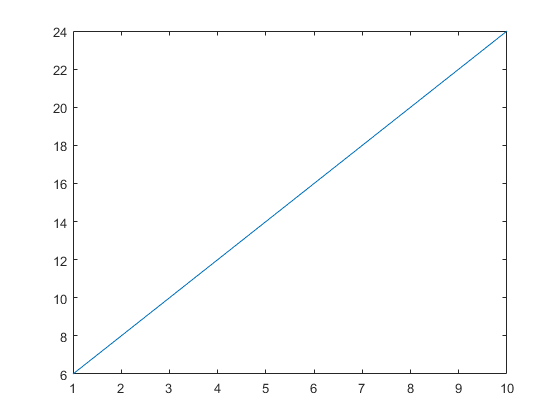

In [29]:
cd 'C:/Users/zurit/OneDrive/PROJECTS/DEVELOPING/blog/files'
% output = fnc(1,1)

format compact
for i=1:10
    c(i:10) = fnc(i,i+1)
end

plot(1:10,c)

In [ ]:
clear variables; close all; clc;

In [ ]:
% Global constants
% generate N random numbers in the interval (a,b), r = a + (b-a).*rand(N,1)

x0 = [1.5; 1];
nk = 100;       % simulation steps
Ts = 0.1;       % sampling time
t = Ts*(0:nk);  % time simulation
N = 5;     % Horizon increase N and cost value J(k) is reduced (better performance)
d = 0;

In [ ]:
% System 

% sys = (-s+1)/((s-2)*(s+1));
[Ac,Bc,Cc,Dc] = tf2ss([-1 1],[1 -1 -2]);
Bdc = [1;0]; Ddc = 0;
sysc = ss(Ac,[Bc Bdc],Cc,[Dc Ddc]);

sysd = c2d(sysc,Ts);
A = sysd.A; 
B = sysd.B(:,1); 
Bd = sysd.B(:,2); 
C = sysd.C; 
D = sysd.D(:,1); 
% Dd = sysd.d(:,2);

In [ ]:
% Cost matrices                 
Q = 1e6*eye(2); % Q^(1/2) 
R = 1;

In [ ]:
% System Dimensions
n  = size(A, 1);    % Number of State variables
m  = size(B, 2);    % Number of Input variables
p  = size(C, 1);    % Number of Output measurments 

In [ ]:
% === K LQR ==============================================================
K_lqr = -dlqr(A,B,Q,R)

In [ ]:
% Constraints
% Input constraints
u_max = 10; u_min = 10;
Pu = [1; -1];
qu = [u_max; u_min]; 
U = Polyhedron(Pu,qu);
% U.plot('alpha',0.1,'LineStyle','--');

% State constraints
x_max = 2; x_min = 2;
Px = [eye(n); -eye(n)];
qx = [ones(n,1)*x_max; ones(n,1)*x_min];
X = Polyhedron(Px,qx);
% X.plot('alpha',0.0,'LineStyle','--');

In [ ]:
% Deadbeat Terminal Inequality State constraints (with deadbet mode-2 gain or any gain K)
% K = -acker(A,B,[0,0]); 
% K = -place(A,B,[0 0]); % does not work with place
K = -dlqr(A,B,Q,R);
nn = N;
Maux = [];
for i=0:nn-1
    Maux = [Maux;(A+B*K)^(i)];
end 
Mm = kron(eye(nn),[Px; Pu*K]);

% regulation
PxN = Mm*Maux; 
qxN = kron(ones(nn,1),[qx; qu]);% deadbeat terminal inequality constraints
Xf = Polyhedron(PxN,qxN);
% figure,Xf.plot()

In [ ]:
% MPT3 - Control Invariant Set (CIS)
% computes a control invariant set for LTI system x^+ = A*x+B*u
% When applied to an autonomous system , the method computes the maximal positively invariant set. 
% When applied to a non-autonomous system, the maximal control invariant set is computed. 
system = LTISystem('A', A, 'B', B);
system.x.min = [-x_min; -x_min];
system.x.max = [x_max; x_max];
system.u.min = -u_min;
system.u.max = u_max;
InvSet = system.invariantSet(); % XN = Control Invariant Set
Pxx = InvSet.A; qxx = InvSet.b;
InvSet.plot('alpha',0.1,'color','lightblue')
XN = Polyhedron(InvSet.A,InvSet.b);
figure,XN.plot('alpha',0.1,'color','lightblue');

# MPC with feed forward Steady-State Target Optimization (SSTO)

The following presents a constrained Linear Quadratic Model Predictive Control (LQ-MPC) with offset-free tracking and disturbance rejection using the feed-forward Steady-State Target Optimization (SSTO) approach for an isolated power system. The MPC control law uses Finite-Receding-Horizon method in dual-mode.



# System and design requirements


<object data="https://drive.google.com/viewerng/viewer?embedded=true&url=https://raw.githubusercontent.com/paulomarconi/MPC-SSTO/master/ACS6116_assignment_only.pdf" width="100%" height="800px"> 
    <p>It appears you don't have a PDF plugin for this browser or JavaScript is disabled. You can <a href="https://drive.google.com/viewerng/viewer?embedded=true&url=https://raw.githubusercontent.com/paulomarconi/MPC-SSTO/master/ACS6116_assignment_only.pdf">download the PDF.</a></p>  
</object>



# The proposed solution

<object data="https://drive.google.com/viewerng/viewer?embedded=true&url=https://raw.githubusercontent.com/paulomarconi/MPC-SSTO/master/report/root.pdf" width="100%" height="800px"> 
    <p>It appears you don't have a PDF plugin for this browser or JavaScript is disabled. You can <a href="https://drive.google.com/viewerng/viewer?embedded=true&url=https://raw.githubusercontent.com/paulomarconi/MPC-SSTO/master/report/root.pdf">download the PDF.</a></p>  
</object>


Source code on [GitHub](https://github.com/paulomarconi/MPC-SSTO).